<a href="https://colab.research.google.com/github/narvitp/Data-Analyst-Course/blob/main/Copy_of_HW_11_2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Course/Data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [5]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,5,52,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday,5,52,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday,5,52,2011,1


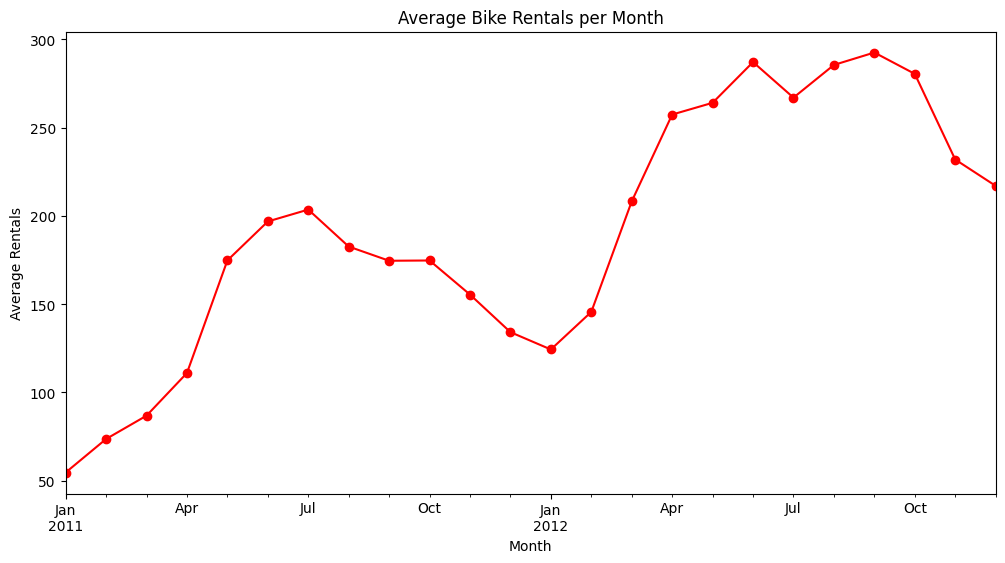

In [6]:
monthly_sales = df['count'].resample('ME').mean()
monthly_sales.plot(
    figsize=(12,6),
    marker = 'o',
    title= 'Average Bike Rentals per Month',
    xlabel='Month',
    ylabel='Average Rentals',
    color = 'red'
    )
plt.show();

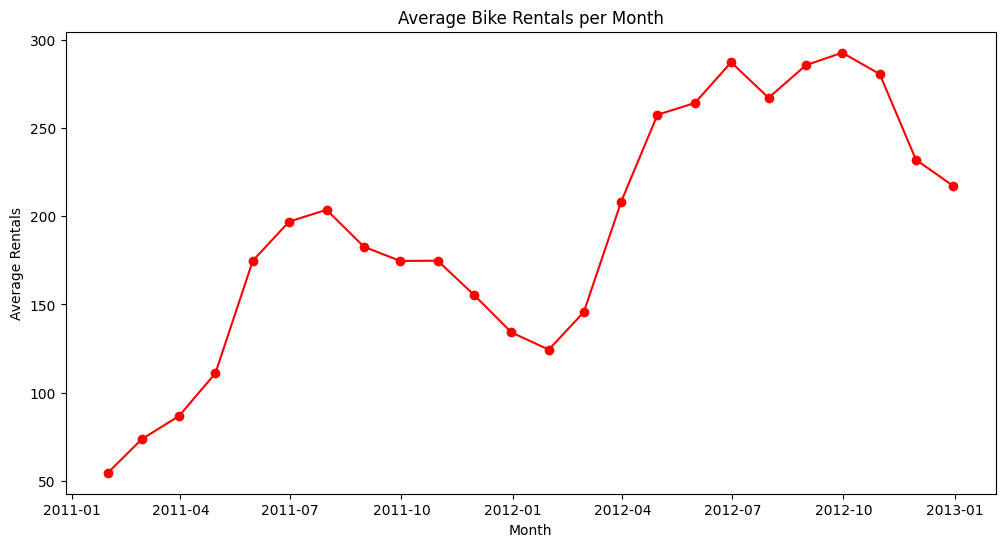

In [7]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, marker='o', color = 'red')
plt.title('Average Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.show()

Для такого простого графіку використання Pandas здається більш простим ніж із Matplotlib. Єдиний мінус тут був у тому, що Matplotlib не відображає на осі ОХ місяці назвами, а лише фоматами дати, що є не зручним, Padas же змінює відображення на назви місяців.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [8]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень2

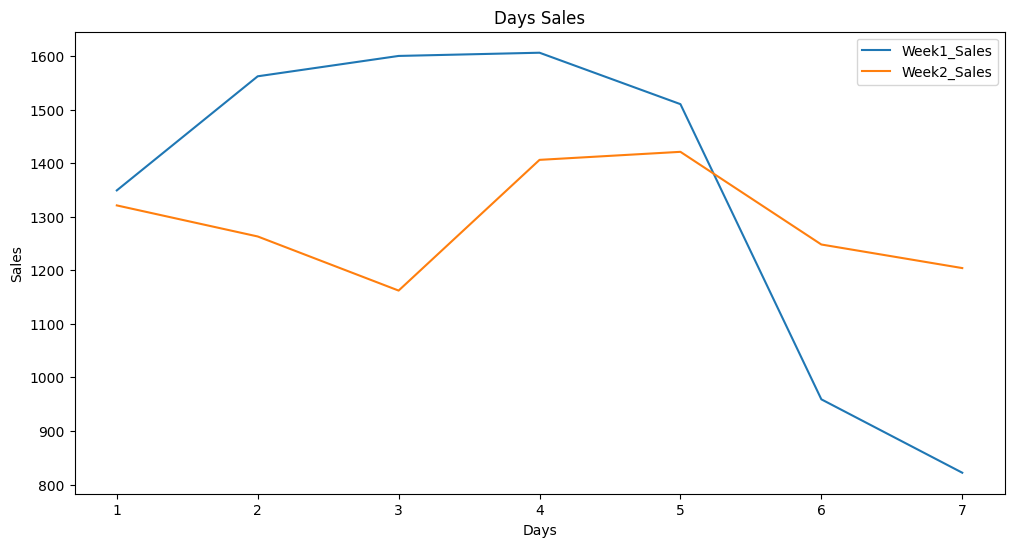

In [9]:

plt.figure(figsize=(12,6))
plt.plot(days, sales_week1, label='Week1_Sales')
plt.plot(days, sales_week2, label='Week2_Sales')

plt.title('Days Sales')
plt.ylabel('Sales')
plt.xlabel('Days')

plt.legend()
plt.show()

Судячи по графіку, продажі другого тижня були більш стабільніші. Ми могли б підтвердити це порівнявши середнє арифметичне та медіану, де б розбіжність була б бідьша свідчило б про менш стабліні продажі.

In [10]:
print(np.mean(sales_week1))
print(np.median(sales_week1))
print(np.mean(sales_week2))
print(np.median(sales_week2))


1344.0
1510.0
1289.2857142857142
1263.0


Ми бачимо по розрахунках, що відхилення між медіаною та середнім у другому тижня є значно меншим, тому графік і виглядає стабільнішим.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

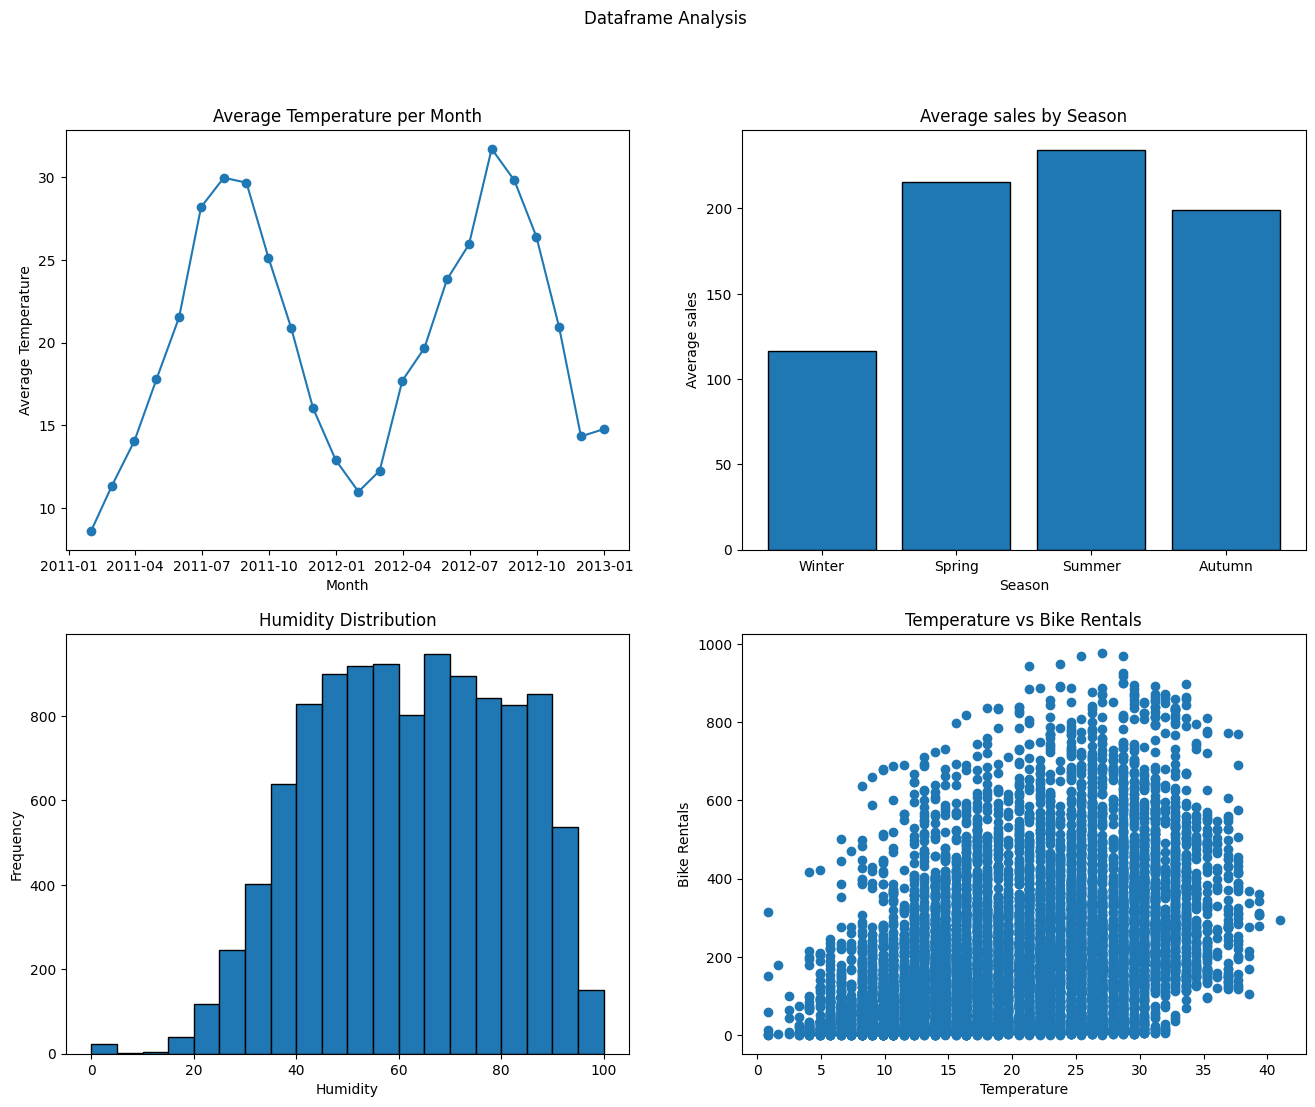

In [56]:
from numpy._core.defchararray import count
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(df['temp'].resample('ME').mean(), '-o')
plt.title('Average Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')

plt.subplot(2, 2, 2)
season_grouped = df.groupby('season')['count'].mean()
plt.bar(season_grouped.index, season_grouped.values, edgecolor='black')
plt.xticks([1,2,3,4], ['Winter', 'Spring', 'Summer', 'Autumn'])
plt.xlabel("Season")
plt.ylabel("Average sales")
plt.title("Average sales by Season")


plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=20, edgecolor='black')
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'])
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')

plt.suptitle('Dataframe Analysis')
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

Text(0, 0.5, 'Bike Rentals')

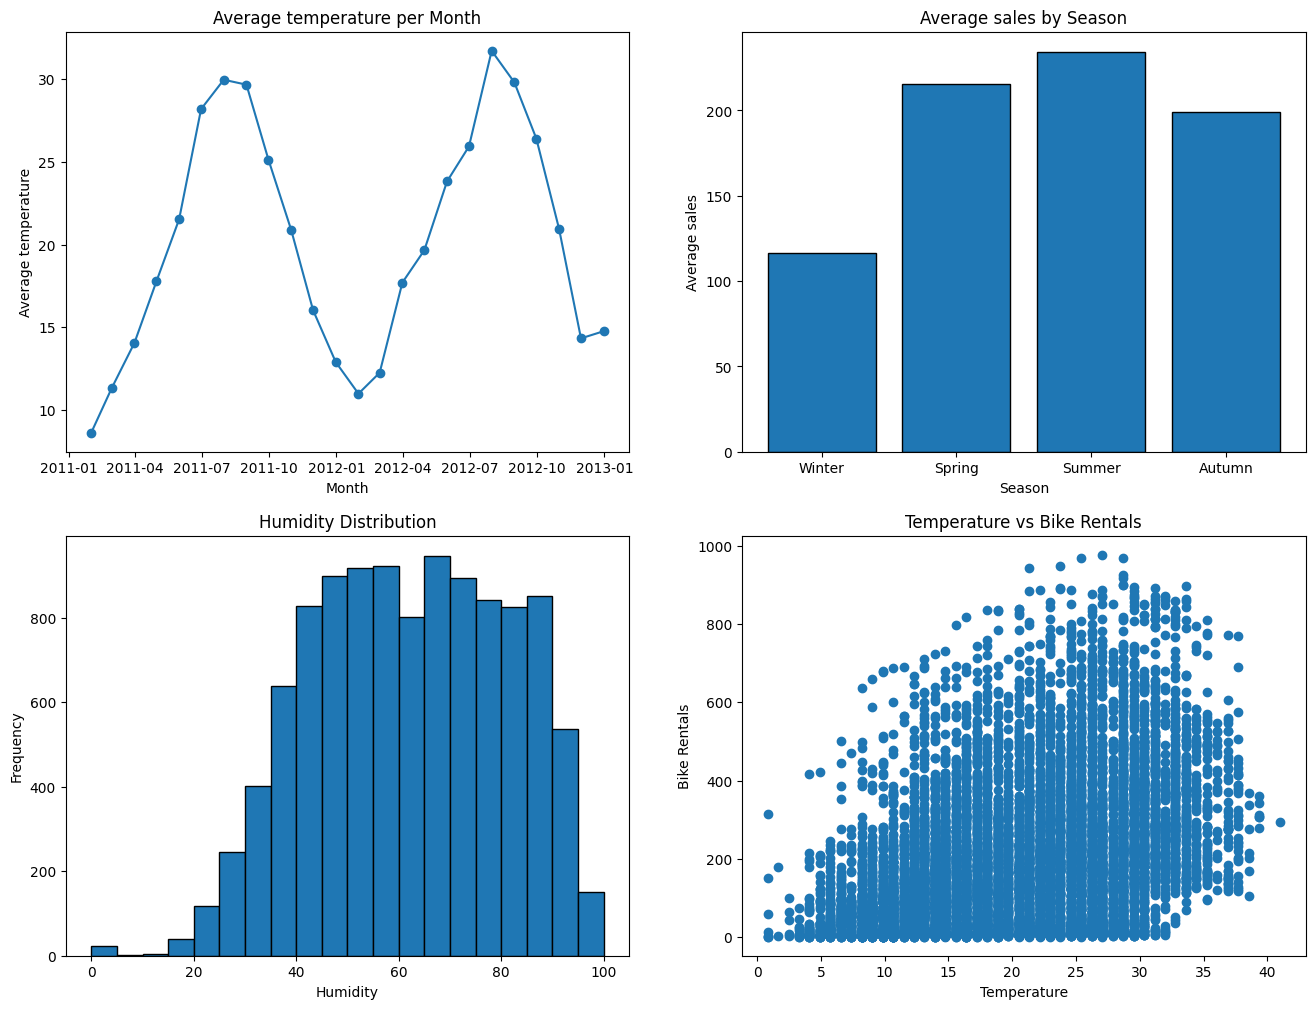

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax[0, 0].plot(df['temp'].resample('ME').mean(), '-o')
ax[0, 0].set_title('Average temperature per Month')
ax[0, 0].set_xlabel('Month')
ax[0, 0].set_ylabel('Average temperature')

ax[0, 1].bar(season_grouped.index, season_grouped.values, edgecolor='black')
ax[0, 1].set_xticks([1,2,3,4], ['Winter', 'Spring', 'Summer', 'Autumn'])
ax[0, 1].set_title('Average sales by Season')
ax[0, 1].set_xlabel('Season')
ax[0, 1].set_ylabel('Average sales')

ax[1, 0].hist(df['humidity'], bins=20, edgecolor='black')
ax[1, 0].set_title('Humidity Distribution')
ax[1, 0].set_xlabel('Humidity')
ax[1, 0].set_ylabel('Frequency')

ax[1, 1].scatter(df['temp'], df['count'])
ax[1, 1].set_title('Temperature vs Bike Rentals')
ax[1, 1].set_xlabel('Temperature')
ax[1, 1].set_ylabel('Bike Rentals')

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?